In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from pyvi import ViTokenizer, ViPosTagger
import pickle
import re
import string
from string import digits

In [ ]:
pip install pyvi 

     |████████████████████████████████| 8.5MB 5.0MB/s 
     |████████████████████████████████| 747kB 48.2MB/s 


In [ ]:
from google.colab import drive

drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/FSI_Problem'
!ls

/content/drive/My Drive/FSI_Problem
 Bert_Sentiment_AmazonDataset.ipynb	   svc_rbf_v2.pkl
 check_text.csv				   test.crash
 Clone_Foody.ipynb			   Test_ML.ipynb
 Concat_Data.ipynb			  'Test_ML with Tokenize.ipynb'
'Copy of Test_Foody.ipynb'		   Test_PhoBert.ipynb
'Copy of Viblo_Sentiment.ipynb'		   tfidf.pkl
 Data					   tfidf_rbf.pkl
 LR_Model.pkl				   tfidf_v2.pkl
 MultiBert_Sentiment_AmazonDataset.ipynb   tfidf_v3.pkl
 PhoBERT_base_fairseq			   train.crash
 PhoBERT_base_fairseq.tar.gz		   train_dataloader.pkl
 PhoBERT_base_transformers		   val_dataloader.pkl
 PhoBERT_base_transformers.tar.gz	   vncorenlp
 PhoBert_Sentiment_Foody.ipynb		   X1.pkl
 PhoBert_Sentiment.ipynb		   y1.pkl
 svc_rbf.pkl


In [ ]:
data_add = pd.read_csv('Data/data_added_16h33.csv')
data_add = data_add.rename(columns={'label':'labels'})

data_28 = pd.read_csv('Data/data_update_28.csv')
data_28 = data_add.rename(columns={'label':'labels'}) 

data_dep = pd.read_csv("Data/datadepvail.csv") 

data_add = data_add.drop(['Unnamed: 0'],axis=1)
data_dep = data_dep.drop(['Unnamed: 0'],axis=1)
data_28 = data_28.drop(['Unnamed: 0'],axis=1)

#Concat 
data = pd.concat([data_add,data_dep,data_28])
data

,labels,comment
0,1.0,"nồi đẹp , nấu tốt mỗi tội giao hàng lâu"
1,1.0,Điểm cộng là cảm quan thiết kế đẹp mắt. Điểm t...
2,0.0,nồi mỏng vậy nướng rán cũng sợ cháy.
3,1.0,"mình đã nhận được hàng rồi, mẫu mã như hình nh..."
4,1.0,"Mẫu mã đẹp, phù hợp mang theo đi làm , nhưng c..."
...,...,...
335,1.0,giặt sạch nhưng mùi không thơm
336,1.0,sản phẩm không được mong đợi nhưng giá cả rẻ
337,1.0,Cách bảo quản sản phẩm không tốt. tiki giao hà...
338,1.0,đóng gói đẹp nhưng sản phẩm khó sử dụng


In [ ]:
# data = pd.read_csv("Data/datadepvail.csv")

In [ ]:
data = data.dropna() 

In [ ]:
#data = data.drop_duplicates(subset=['text'])

In [ ]:
data

,labels,comment
0,1.0,"nồi đẹp , nấu tốt mỗi tội giao hàng lâu"
1,1.0,Điểm cộng là cảm quan thiết kế đẹp mắt. Điểm t...
2,0.0,nồi mỏng vậy nướng rán cũng sợ cháy.
3,1.0,"mình đã nhận được hàng rồi, mẫu mã như hình nh..."
4,1.0,"Mẫu mã đẹp, phù hợp mang theo đi làm , nhưng c..."
...,...,...
335,1.0,giặt sạch nhưng mùi không thơm
336,1.0,sản phẩm không được mong đợi nhưng giá cả rẻ
337,1.0,Cách bảo quản sản phẩm không tốt. tiki giao hà...
338,1.0,đóng gói đẹp nhưng sản phẩm khó sử dụng


In [ ]:
data['labels'].value_counts()

0.0    3971
2.0    3129
1.0    2704
Name: labels, dtype: int64

In [ ]:
data_0 = data[data['labels'] == 0] 
data_0_index = data_0.index 
data_0_trim = []
for i in range(800):
  data_0_trim.append(data_0_index[i]) 

data = data.drop(data_0_trim) 
data

,labels,comment
1,1.0,Điểm cộng là cảm quan thiết kế đẹp mắt. Điểm t...
4,1.0,"Mẫu mã đẹp, phù hợp mang theo đi làm , nhưng c..."
5,1.0,Ngăn to nấu cơm đáy rất mỏng còn các ngăn khác...
6,1.0,"Hàng mới , tất cả đều mới nhưng dây điện lại h..."
8,1.0,giao hàng chưa đứng nhưng được cái nồi cũng kh...
...,...,...
335,1.0,giặt sạch nhưng mùi không thơm
336,1.0,sản phẩm không được mong đợi nhưng giá cả rẻ
337,1.0,Cách bảo quản sản phẩm không tốt. tiki giao hà...
338,1.0,đóng gói đẹp nhưng sản phẩm khó sử dụng


In [ ]:
data['labels'].value_counts()

0.0    3148
2.0    3114
1.0    2651
Name: labels, dtype: int64

In [ ]:
def pre_processing(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    remove_digits = str.maketrans('', '', digits) 
    text = text.translate(remove_digits)

    return text 

In [ ]:
X = data.comment.values 
y = data.labels.values

In [ ]:
for i in range(len(X)):
  X[i] = pre_processing(X[i])

In [ ]:
X[12]

'hàng mới mở từ hộp ra nhưng đã bị móp tuy nhiên các bạn tiếp nhận thông tin đổi trả rất nhanh nhẹn và nhiệt tình'

In [ ]:
def add_postag(comment): 
  comment = comment.lower()
  a = ViPosTagger.postagging(ViTokenizer.tokenize(comment))
  X = []
  for i in range(len(a[0])):
    test = a[0][i] + "_" + a[1][i]
    X.append(test)
  b = " ".join(X)
  return b

print(add_postag("Đại học bách khoa hà nội"))



đại_học_N bách_khoa_V hà_nội_N


In [ ]:
def array_postag(X):
  X_pos = []
  for comment in X: 
    X_pos.append(add_postag(comment))

  return X_pos

X = array_postag(X)

In [ ]:
X[12] , y[12]

('hàng_N mới_R mở_V từ_E hộp_N ra_V nhưng_C đã_R bị_V móp_V tuy_nhiên_C các_L bạn_N tiếp_nhận_V thông_tin_N đổi_V trả_V rất_R nhanh_nhẹn_A và_C nhiệt_tình_A',
 1.0)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.99)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
# #Save tfidf 

tfidf = "tfidf_v3.pkl"  
with open(tfidf, 'wb') as file:  
     pickle.dump(tfidf_vectorizer, file)

In [ ]:
#Load tfidf

tfidf = "tfidf_v3.pkl"  

with open(tfidf, 'rb') as file:  
     tfidf_test = pickle.load(file) 


In [ ]:
tfidf_train = tfidf_test.transform(x_train) 
tfidf_test = tfidf_test.transform(x_test)

In [ ]:
num_folds = 10
scoring = 'accuracy'
seed = 42

In [ ]:
models = [] 
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('MNB',MultinomialNB()))
models.append(('CNB',ComplementNB()))
models.append(('BNB',BernoulliNB()))
models.append(('PAC', PassiveAggressiveClassifier(max_iter=50)))
models.append(('LinearSVC',LinearSVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, tfidf_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.828331 (0.010758)
KNN: 0.703086 (0.018607)
CART: 0.808836 (0.012147)
MNB: 0.793548 (0.012431)
CNB: 0.783731 (0.015155)
BNB: 0.776157 (0.008875)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


PAC: 0.839972 (0.011573)
LinearSVC: 0.853296 (0.010648)


In [ ]:
results =  []
kernels = ['linear', 'rbf', 'poly','sigmoid']
for kernel in kernels:
  model = SVC(kernel=kernel)
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, tfidf_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  msg = "%s: %f (%f)" % (kernel, cv_results.mean(), cv_results.std())
  print(msg)

linear: 0.839832 (0.015527)
rbf: 0.869986 (0.010937)
poly: 0.824684 (0.012000)
sigmoid: 0.818233 (0.013659)


In [ ]:
model = SVC(kernel='rbf', C = 9)
model.fit(tfidf_train,y_train) 

SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_rbf = "svc_rbf_v2.pkl"  
with open(svc_rbf, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
abc = "svc_rbf_v2.pkl"  

with open(abc, 'rb') as file:  
    svc_load = pickle.load(file)

svc_load 

SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
cs = [ 1, 6, 9, 10 ]
for c in cs : 
  model = SVC(kernel='rbf', C=c)
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, tfidf_train, y_train, cv=kfold, scoring=scoring)
  msg = "%f: %f (%f)" % (c, cv_results.mean(), cv_results.std())
  print(msg)

1.000000: 0.864252 (0.012231)
6.000000: 0.871213 (0.011404)
9.000000: 0.871504 (0.011282)
10.000000: 0.871359 (0.011315)


In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, tfidf_train, y_train, cv=kfold, scoring=scoring)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.737923 (0.015094)
GBM: 0.775487 (0.014054)
RF: 0.858304 (0.010265)
ET: 0.860191 (0.011618)


In [ ]:
# model = SVC(kernel='rbf')
# model.fit(tfidf_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc_load.predict(tfidf_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

len(y_test)

0.8956814357823892
[[589  17   9]
 [ 54 446  47]
 [ 19  40 562]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       615
         1.0       0.89      0.82      0.85       547
         2.0       0.91      0.90      0.91       621

    accuracy                           0.90      1783
   macro avg       0.90      0.89      0.89      1783
weighted avg       0.90      0.90      0.89      1783



1783

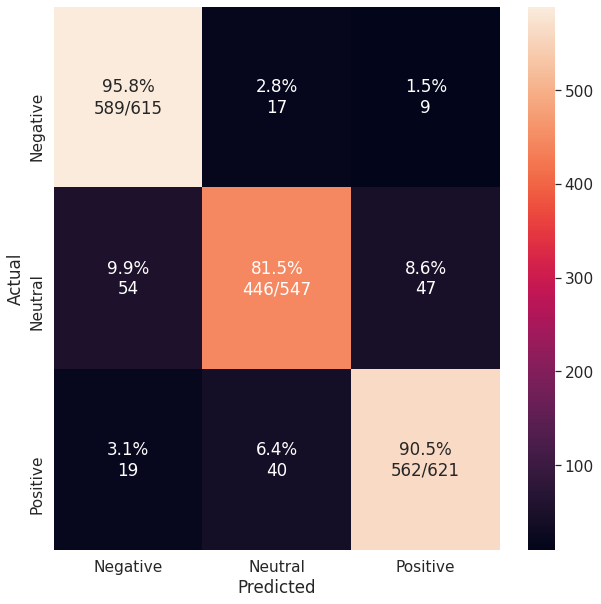

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax) 

y_true = y_test.tolist()
y_pred = y_pred.tolist()
for i in range(len(y_true)):
  if y_pred[i] == 0:
    y_pred[i] = "Negative"
  if y_pred[i] == 1:
    y_pred[i] = "Neutral"
  if y_pred[i] == 2:
    y_pred[i] = "Positive"
  if y_true[i] == 0:
    y_true[i] = "Negative"
  if y_true[i] == 1:
    y_true[i] = "Neutral"
  if y_true[i] == 2:
    y_true[i] = "Positive"
labels = ["Negative", "Neutral", "Positive"]
cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10))

In [ ]:

def most_informative_feature_for_binary_classification(vectorizer, classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef, feat in topn_class1:
        print(class_labels[2], coef, feat)
    print()
    for coef, feat in reversed(topn_class2):
        print(class_labels[0], coef, feat)
    
most_informative_feature_for_binary_classification(tfidf_vectorizer, lr, n=10)

2.0 -3.199268610997876 đẹp
2.0 -2.523836633986227 nhanh
2.0 -2.383806552462581 ok
2.0 -1.8470000484910838 tốt
2.0 -1.8332275358502068 giày
2.0 -1.6584922711568166 nhưng
2.0 -1.4759650689488317 tuy_nhiên
2.0 -1.4505566469701616 ổn
2.0 -1.3814109262055188 tạm
2.0 -1.1854055486252784 giá

0.0 2.686039233861522 không
0.0 2.1290618291426533 tệ
0.0 2.0187969852312384 thất_vọng
0.0 1.7482784900126316 quá
0.0 1.7165714468035678 ko
0.0 1.5292757691671197 kém
0.0 1.4755180112427595 xấu
0.0 1.363804279001432 thiếu
0.0 1.3196063069624144 bán
0.0 1.2626398575264985 bị
